# Support Vector Classifiers (SVCs): A Comprehensive Guide
*By Cristian Leo*

*Link Article*: https://medium.com/ai-in-plain-english/support-vector-classifiers-svcs-a-comprehensive-guide-a9115a99a94f

## Introduction

Support Vector Classifiers (SVCs) are a type of machine learning algorithm designed for classification tasks. They revolve around the concept of finding a hyperplane that maximizes the margin between two classes in the data. Widely applicable, SVCs demonstrate their prowess in image classification, text classification, and spam filtering, known for their accuracy and resilience to noise.

## How SVCs Work

### Support Vector Machines (SVMs) Operation

Support Vector Machines (SVMs) operate by identifying the hyperplane that maximizes the margin between two classes. Utilizing quadratic programming, a mathematical technique tailored for optimization with quadratic objective functions and linear constraints, SVMs determine the hyperplane with the largest margin. The margin is computed using the formula:

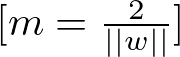

Here, 'w' represents the weight vector, measuring the distance between the hyperplane and the closest data points (support vectors) of each class. Once established, SVMs classify new data points by predicting the class of the point nearest to the hyperplane. In linear SVMs, the predictive function is expressed as:

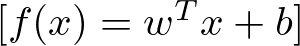

Here, 'f(x)' is the predicted class label, 'x' is the input feature vector, 'w' denotes the weight vector, and 'b' is the bias term.

### Hinge Loss Function

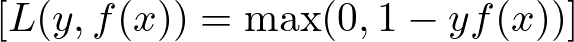

Where:
- 'y' denotes the true label (+1 or -1).
- 'f(x)' signifies the predicted label (sgn(w^T * x + b)).

### Optimization Objective

Minimize the regularized primal loss:

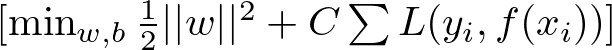

Where:
- 'C' represents the regularization parameter, controlling the trade-off between margin and loss.

## Types of SVCs

There are two main types of SVCs: linear SVCs and nonlinear SVCs.
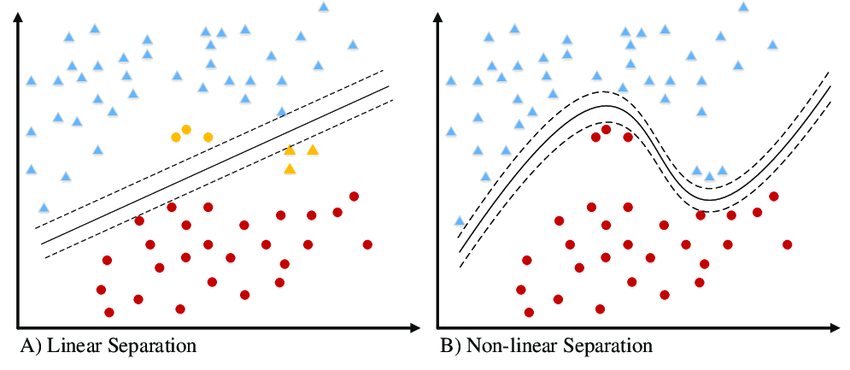

### Linear SVCs

Linear SVCs find a linear hyperplane efficiently separating two classes. While computationally efficient and interpretable, they may struggle to learn complex relationships in input features.

### Nonlinear SVCs

Nonlinear SVCs find a nonlinear hyperplane, offering flexibility in learning complex relationships. However, they are computationally more demanding and may pose interpretation challenges.

### Kernel Functions

Nonlinear SVCs often use kernel functions for implementation. Popular kernels include:
- Linear Kernel
- Polynomial Kernel
- RBF Kernel

The choice of kernel significantly impacts SVC performance, requiring experimentation to find the best fit for the dataset.

## Other Types of SVCs

Apart from linear and nonlinear SVCs, other types include:
- Soft margin SVCs
- Nu-SVCs
- One-class SVCs

Each serves specific purposes, such as handling outliers or controlling support vector fractions.

## Benefits of Using SVCs

- **Accuracy:** SVCs boast high accuracy in various classification tasks.
- **Robustness to Noise:** SVCs exhibit relative robustness to data noise.
- **Interpretability:** SVCs offer interpretability, providing insights into prediction rationales.

## Pitfalls of SVCs

Despite their power, SVCs have pitfalls to consider:
- **Overfitting:** Prone to overfitting, requiring regularization and data normalization.
- **Computational Cost:** Training can be expensive, especially for large datasets.
- **Sensitivity to Outliers:** Outliers can affect hyperplane learning; robust variants or outlier removal may be necessary.

## Applications of SVCs

SVCs find application in various domains, including:
- Image classification
- Text classification
- Spam filtering

## Tips for Using SVCs

- Use a regularization parameter (e.g., 0.1) to prevent overfitting.
- Normalize data for improved performance.
- Employ cross-validation, such as 5-fold cross-validation, for evaluation on unseen data.

SVCs stand as a powerful tool for machine learning classification, offering the potential for accurate and robust models when used judiciously.

## Import Libraries

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
# Load the breast cancer dataset
data = load_breast_cancer()

# Get the feature matrix
X = data.data

# Get the target vector
y = data.target

# Display the first few rows of the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## EDA

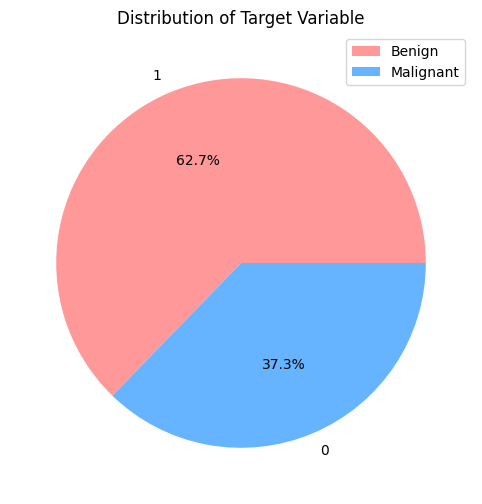

In [3]:
# Plot the distribution of the target variable as a pie chart
plt.figure(figsize=(8, 6))
df['target'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Target Variable')
plt.ylabel('')
plt.legend(['Benign', 'Malignant'])
plt.show()

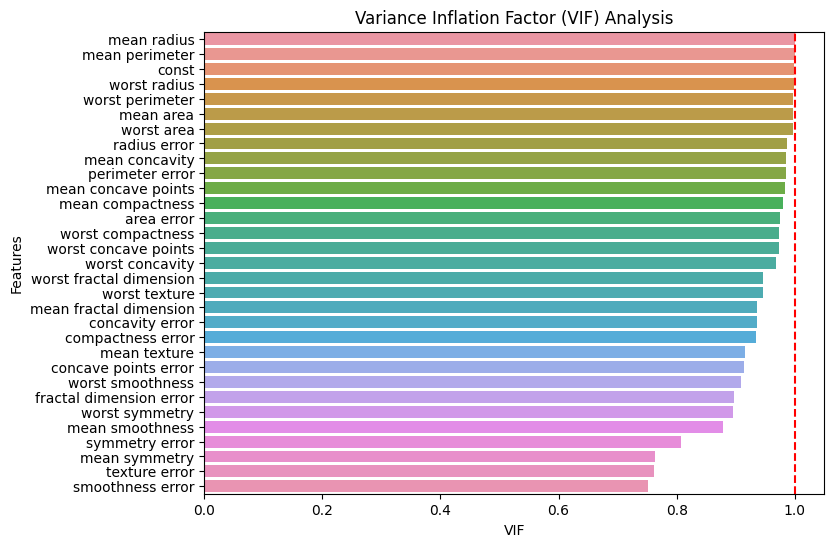

In [4]:
# Calculate the VIF for each feature
X = df.drop('target', axis=1)  # Exclude the target variable
X = sm.add_constant(X)  # Add a constant term for the intercept
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [sm.OLS(X[col], X.drop(col, axis=1)).fit().rsquared for col in X.columns]
vif = vif.sort_values(by='VIF', ascending=False)

# Plot the VIF values horizontally with a threshold line
plt.figure(figsize=(8, 6))
sns.barplot(x='VIF', y='Features', data=vif)
plt.axvline(x=1, color='red', linestyle='--')  # Add a threshold line at VIF = 1
plt.title('Variance Inflation Factor (VIF) Analysis')
plt.xlabel('VIF')
plt.ylabel('Features')
plt.show()

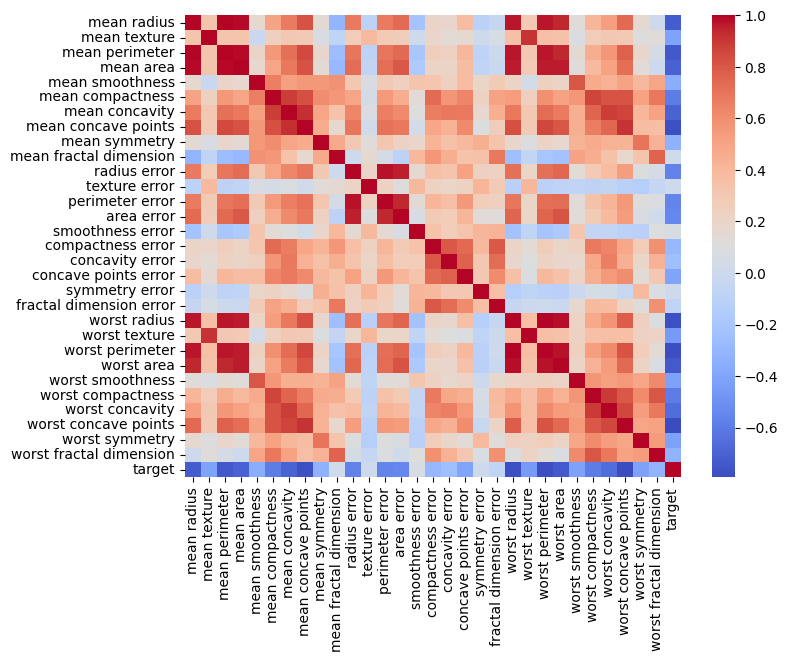

In [5]:
# Plot a scatter plot between two features
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.show()

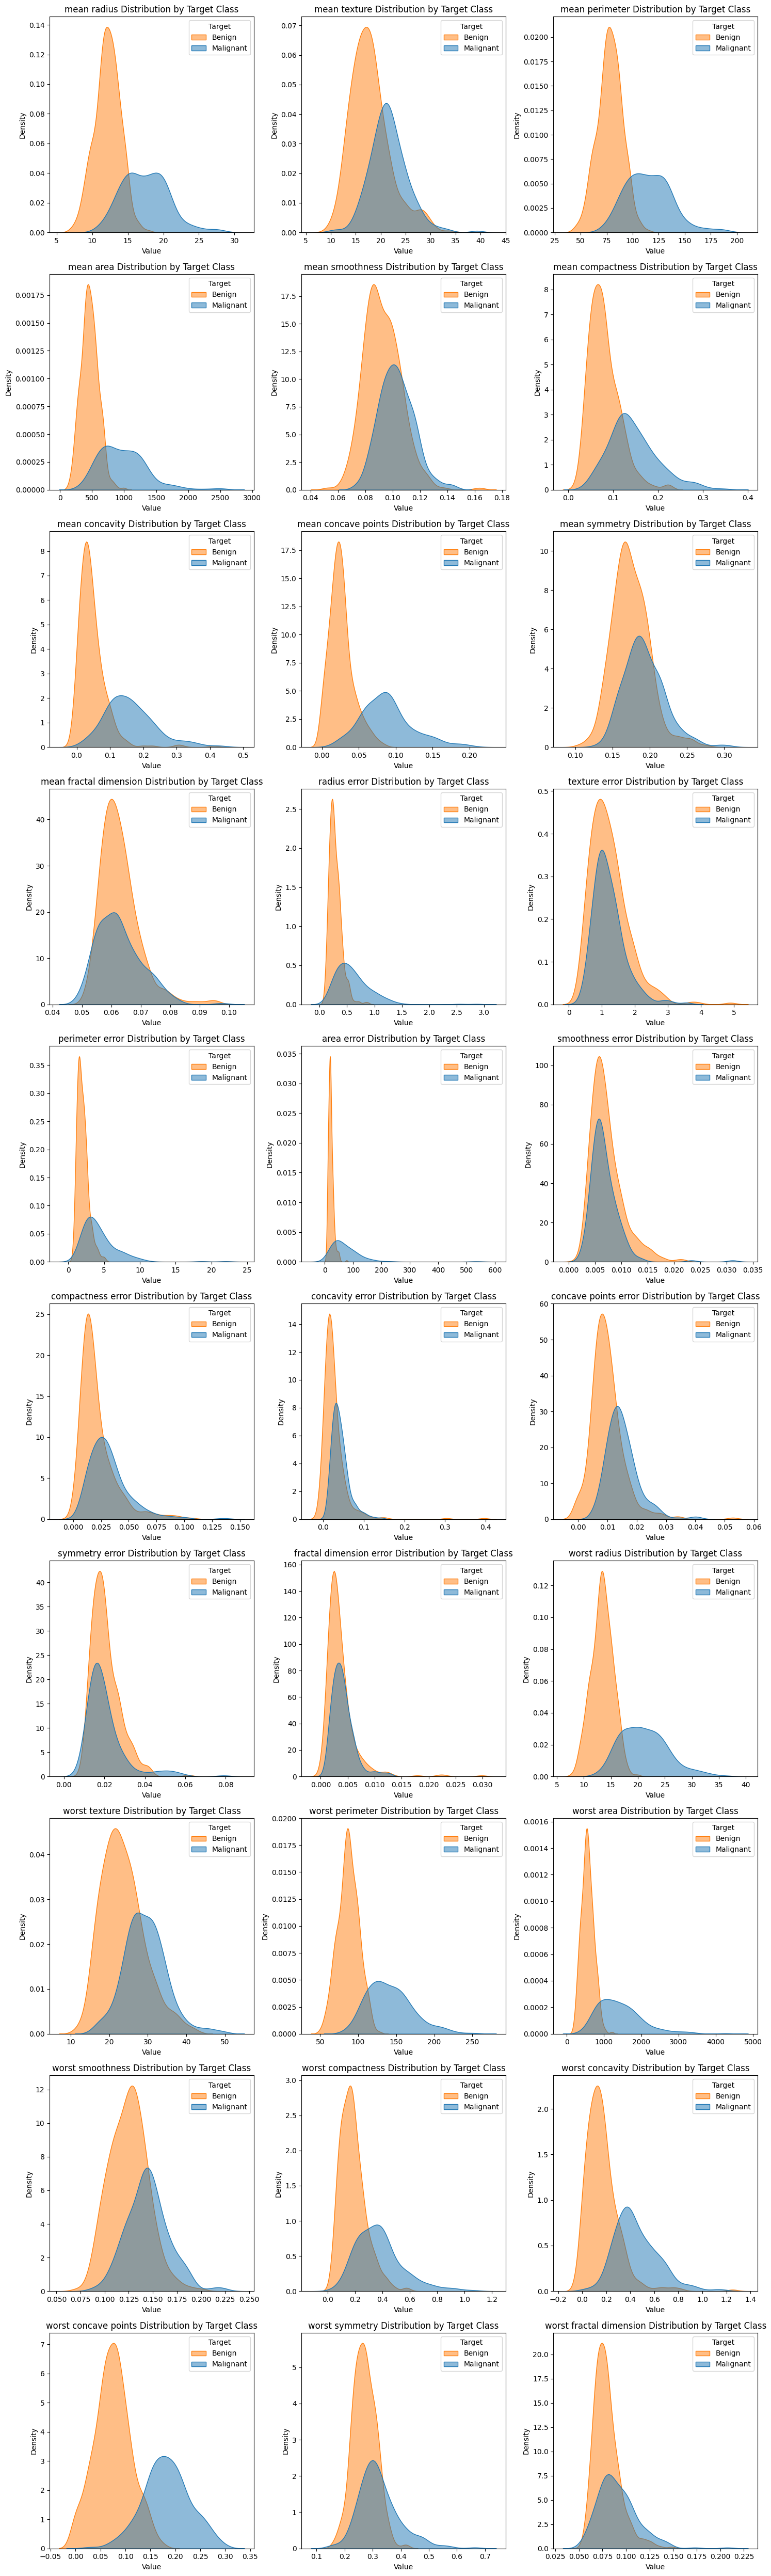

In [6]:
# Get the number of variables
num_variables = len(df.columns[:-1])

# Calculate the number of rows and columns for the subplots grid
num_rows = (num_variables + 2) // 3  # Add 2 to account for legend and title
num_cols = min(num_variables, 3)

# Create the subplots grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Plot the variable distribution by target class
for i, column in enumerate(df.columns[:-1]):
    ax = axes[i]
    sns.kdeplot(data=df, x=column, hue='target', fill=True, alpha=0.5, ax=ax)
    ax.set_title(f'{column} Distribution by Target Class')
    ax.set_xlabel('Value')
    ax.set_ylabel('Density')
    ax.legend(title='Target', labels=['Benign', 'Malignant'])

# Remove any unused subplots
if num_variables < len(axes):
    for j in range(num_variables, len(axes)):
        fig.delaxes(axes[j])

# Adjust the spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

## Split and Scale Data

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_classif
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

# Perform feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Fit SVCs

In [8]:
svcs = {
    'SVC': SVC(),
    'LinearSVC': LinearSVC(),
    'NuSVC': NuSVC()
}

for name, svc in svcs.items():
    svc.fit(X_train_scaled, y_train)
    print(f'{name}: {svc.score(X_test_scaled, y_test):.2%}')

SVC: 97.37%
LinearSVC: 97.37%
NuSVC: 94.74%


## Fit Fine Tuned SVCs

In [9]:
# Define the updated parameter grids for each model
param_grids = {
    'SVC': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'class_weight': [None, 'balanced']
    },
    'LinearSVC': {
        'C': [0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],
        'dual': [True, False],
        'class_weight': [None, 'balanced']
    },
    'NuSVC': {
        'nu': [0.1, 0.5, 0.9],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4],
        'class_weight': [None, 'balanced']
    }
}

scores = {}

# Create an updated GridSearchCV object for each SVC model
grid_searches = {}
for name, svc in svcs.items():
    param_grid = param_grids[name]
    grid_search = GridSearchCV(svc, param_grid, cv=10)  # Increase the number of cross-validation folds to 10
    try:
        grid_search.fit(X_train_scaled, y_train)
        grid_searches[name] = grid_search
    except Exception as e:
        print(f'Error occurred during fitting for {name}: {str(e)}')

# Print the best parameters and score for each model
for name, grid_search in grid_searches.items():
    print(f'{name}:')
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'Best Score: {grid_search.best_score_:.2%}')
    print()
    scores[name] = grid_search.best_score_

SVC:
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Score: 98.03%

LinearSVC:
Best Parameters: {'C': 0.1, 'class_weight': 'balanced', 'dual': False, 'penalty': 'l1'}
Best Score: 97.60%

NuSVC:
Best Parameters: {'class_weight': None, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear', 'nu': 0.1}
Best Score: 98.03%



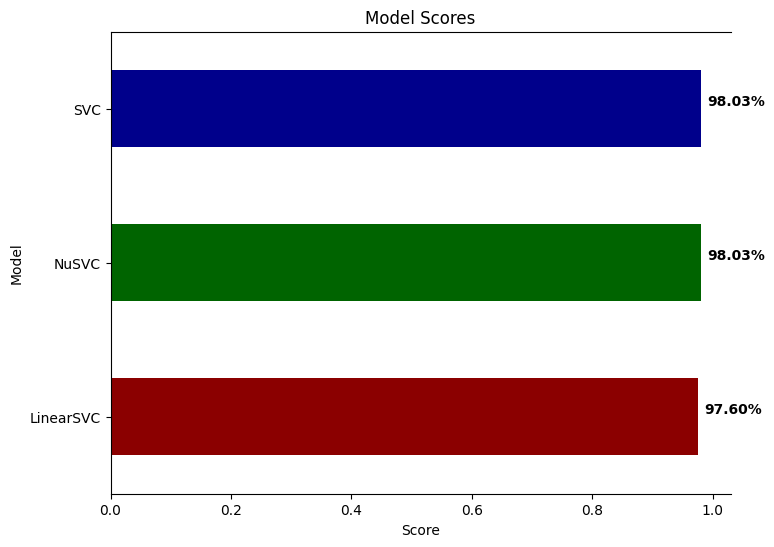

In [10]:
scores = pd.Series(scores)
ax = scores.sort_values(ascending=True).plot.barh(figsize=(8, 6), color=['darkred', 'darkgreen', 'darkblue'])

plt.title('Model Scores')
plt.xlabel('Score')
plt.ylabel('Model')

# Add value labels on the right of each bar
for i, v in enumerate(scores.sort_values(ascending=True)):
    ax.text(v + 0.01, i, str(f'{v:.2%}'), color='black', va='bottom', fontweight='bold')

ax.spines['right'].set_visible(False)
plt.show()